Data Collection

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(10), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40
 5           6  Female   22                  17                      76
 6           7  Female   35                  18                       6
 7           8  Female   23                  18                      94
 8           9    Male   64                  19                       3
 9          10  Female   30                  19                      72,
 None,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000

In [ ]:
count=data.isnull().sum()
count

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Replace NaN of age with mean

In [ ]:
mean_age=data['Age'].mean()
data["Age"].fillna(mean_age,inplace=True)
data.head(10)

<ipython-input-4-c7c3f1d16df0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(mean_age,inplace=True)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Renaming columns for better readability

In [ ]:
# Renaming columns for better readability
data.columns = ["CustomerID", "Gender", "Age", "AnnualIncome", "SpendingScore"]
print(data)

     CustomerID  Gender  Age  AnnualIncome  SpendingScore
0             1    Male   19            15             39
1             2    Male   21            15             81
2             3  Female   20            16              6
3             4  Female   23            16             77
4             5  Female   31            17             40
..          ...     ...  ...           ...            ...
195         196  Female   35           120             79
196         197  Female   45           126             28
197         198    Male   32           126             74
198         199    Male   32           137             18
199         200    Male   30           137             83

[200 rows x 5 columns]


Replace NaN of gender with mode

In [ ]:
mode_gender=data['Gender'].mode()[0]
type(mode_gender)
mode_gender

'Female'

In [ ]:
data["Gender"].fillna(mode_gender,inplace=True)

<ipython-input-7-c77bb1a1f279>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Gender"].fillna(mode_gender,inplace=True)


In [ ]:
data.head(20)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Removing rows with Nan Annual Income and Spending Score

In [ ]:
data.dropna(inplace=True)

In [ ]:
count=data.isnull().sum()
count

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


Convert the Gender column to numerical values using one-hot encoding or label encoding

In [ ]:
# Data transformation (e.g., encoding categorical variables)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1}).astype('int')

In [ ]:
data

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


**bold text**## Save the cleaned dataset

In [ ]:
cleaned_file_path = 'cleaned_mall_customers.csv'
data.to_csv(cleaned_file_path, index=False)

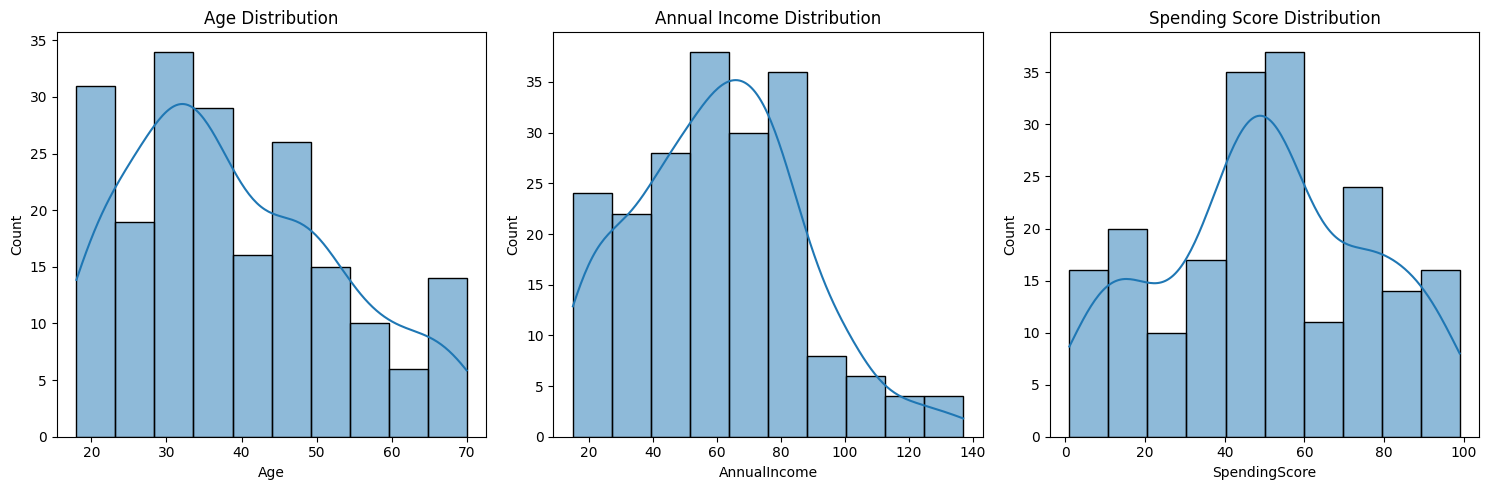

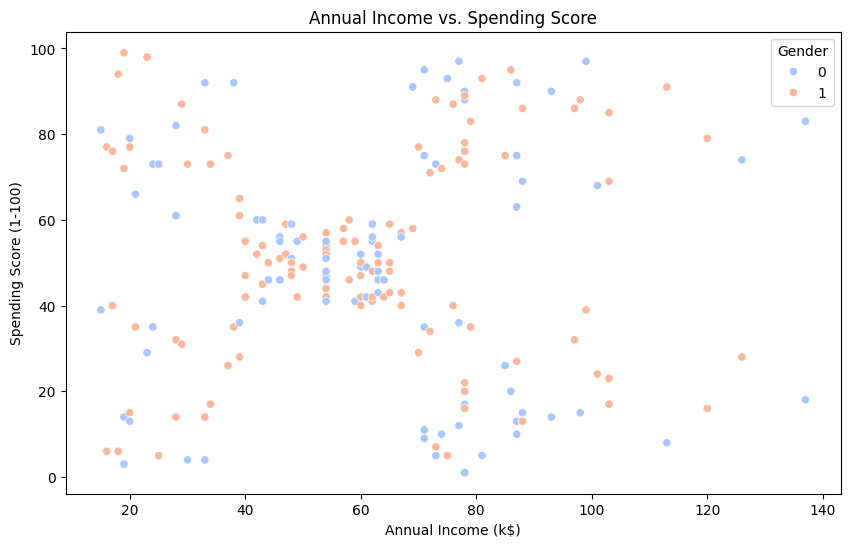

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate descriptive statistics
descriptive_stats = data.describe()

# Create histograms for Age, Annual Income, and Spending Score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['AnnualIncome'], bins=10, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['SpendingScore'], bins=10, kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

# Scatter plot of Annual Income vs. Spending Score colored by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Gender', data=data, palette='coolwarm')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

descriptive_stats


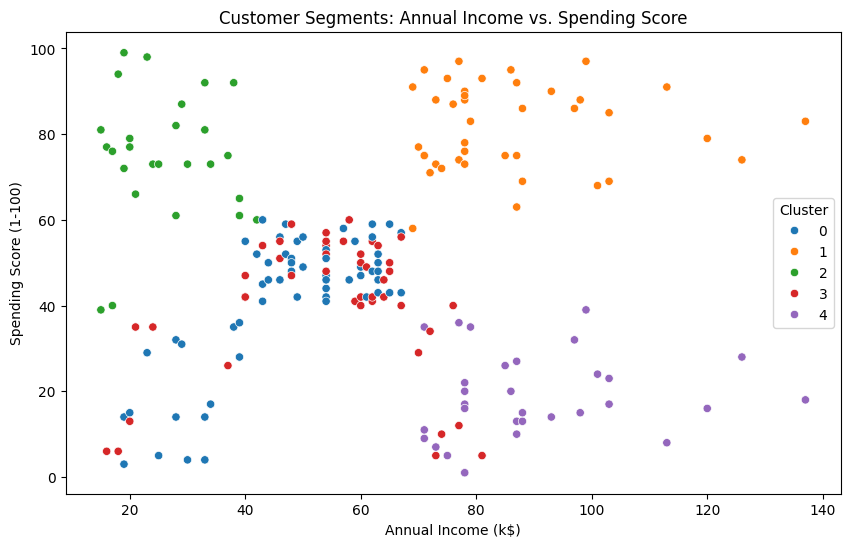

,count
Cluster,
0,58
3,45
1,40
4,31
2,26


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Features to be used for clustering
features = ['Age', 'AnnualIncome', 'SpendingScore']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Create a scatter plot of Annual Income vs. Spending Score, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='tab10', data=data)
plt.title('Customer Segments: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()
data['Cluster'].value_counts()


In [ ]:

# Plotting
plt.bar(df['Age'], df['AnnualIncome'], label = 'Face Cream Sales Data')

plt.xlabel('Age')
plt.ylabel('Annual')  # Updated label for clarity
plt.title('Distribution ')
plt.show()
plt.bar(df['Age'], df['SpendingScore'], label = 'Face Cream Sales Data')

plt.xlabel('Age')
plt.ylabel('spending score')  # Updated label for clarity
plt.title('Distribution ')
plt.show()

NameError: name 'df' is not defined